In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

2023-03-01 00:54:35.497531: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
sample_image = train_images[0]

In [20]:
def show(image):
    plt.figure(figsize=(12, 4))
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

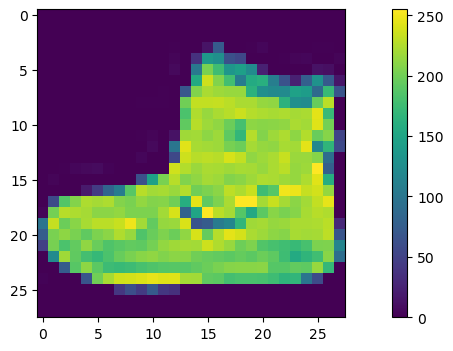

In [21]:
show(sample_image)

## Custom Layer

In [22]:
def conv_layer(input_image=sample_image, kernel=np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]), kernel_size=(3, 3)):
    ret_array = np.zeros(shape=(26, 26))

    for i in range(26):
        for j in range(26):
            tmp_array = input_image[i:i+3, j:j+3]
            ret = kernel * tmp_array
            ret_array[i][j] = ret.sum()
    return ret_array


def pool_layer(input_image=conv_layer(sample_image), pool_size=(2, 2)):
    ret_array = np.zeros(shape=(13, 13))

    for i in range(0, 26, 2):
        for j in range(0, 26, 2):
            tmp_array = input_image[i:i+2, j:j+2]
            ret_array[i//2][j//2] = tmp_array.max()
    return ret_array

In [23]:
ex_1 = conv_layer(kernel=np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]))
ex_2 = conv_layer(kernel=np.array([[-1, 1, 1], [-2, 2, 2], [-1, 0, 1]]))
ex_3 = conv_layer(kernel=np.array([[-1, 4, 1], [-2, 8, 2], [-1, 0, 1]]))
ex_4 = conv_layer(kernel=np.array([[-1, -1, 1], [-2, -2, 2], [-1, 0, 1]]))
ex_5 = conv_layer(kernel=np.array([[-1, -4, 1], [-2, -8, 2], [-1, 0, 1]]))


Sample Image


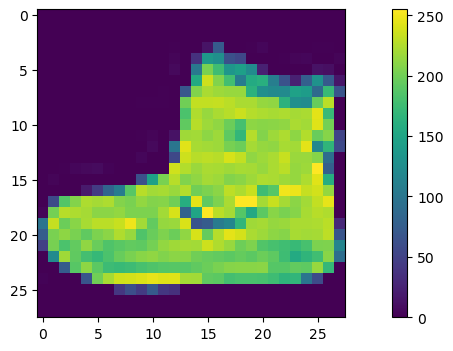

Image after convolution layer


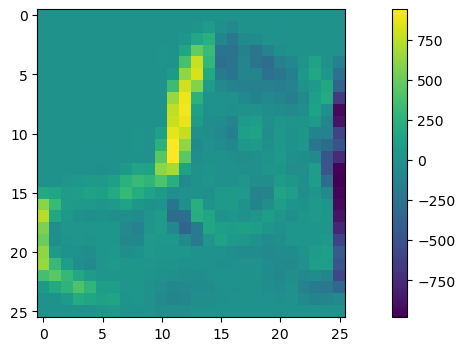

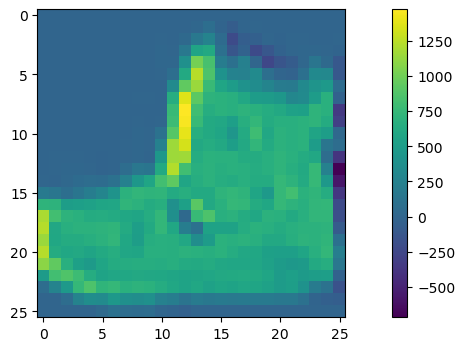

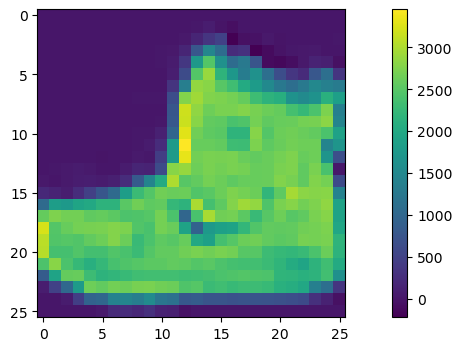

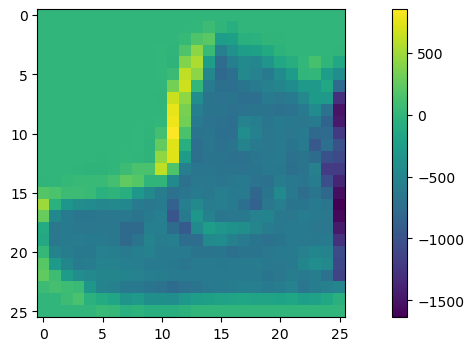

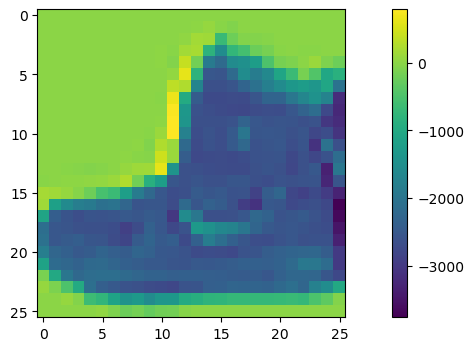

Image after pool layer


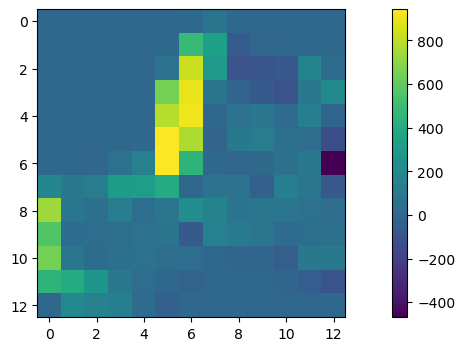

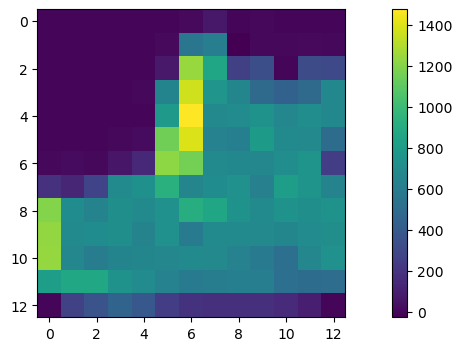

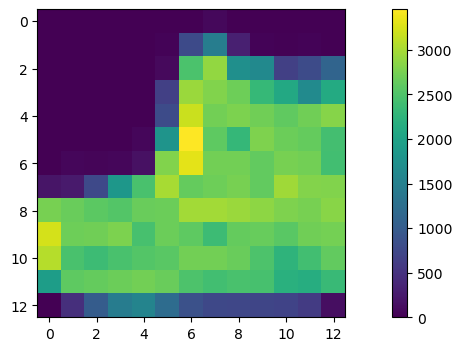

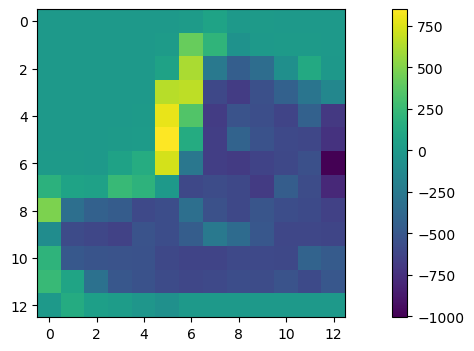

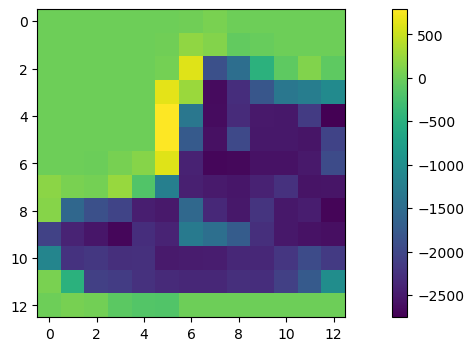

In [24]:
print("Sample Image")
show(sample_image)
print("Image after convolution layer")
show(ex_1)
show(ex_2)
show(ex_3)
show(ex_4)
show(ex_5)
print("Image after pool layer")
show(pool_layer(ex_1))
show(pool_layer(ex_2))
show(pool_layer(ex_3))
show(pool_layer(ex_4))
show(pool_layer(ex_5))

## Tensorflow layer

In [40]:
conv_model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1))])
pool_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(26, 26, 64)),
    tf.keras.layers.MaxPool2D(2, 2),
])

In [41]:
conv_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
Total params: 640
Trainable params: 640
Non-trainable params: 0
_________________________________________________________________


In [42]:
pool_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


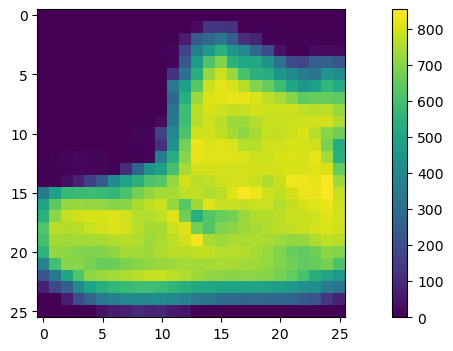

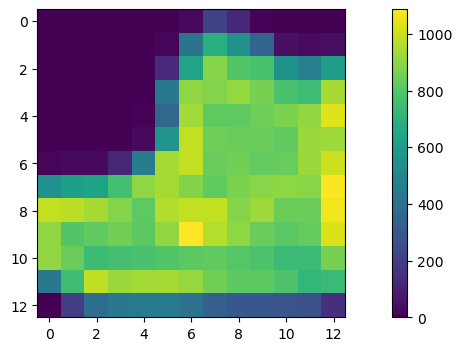

In [43]:
ex_6 = conv_model(sample_image.reshape(1, 28, 28, 1))
ex_7 = pool_model(ex_6)

show(np.array(ex_6).sum(axis=3).reshape(26, 26))
show(np.array(ex_7).sum(axis=3).reshape(13, 13))
